<a href="https://colab.research.google.com/github/DenisVasil/Airflow_DAGs/blob/main/Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras

In [ ]:
fashion_mnist.load_data()

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

In [ ]:
(X_train_full, y_train_full), (X_test, y_test) = (fashion_mnist.load_data())

4422102/4422102 [==============================] - 1s 0us/step


In [ ]:
X_train_full.shape

(60000, 28, 28)

In [ ]:
X_train_full.dtype

dtype('uint8')

In [ ]:
X_valid, X_train = X_train_full[:5000]/225.0, X_train_full[5000:]/255.0
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]

In [ ]:
class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
"Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

In [ ]:
class_names[y_train[0]]

'Coat'

In [ ]:
class_names[y_train[2]]

'Sneaker'

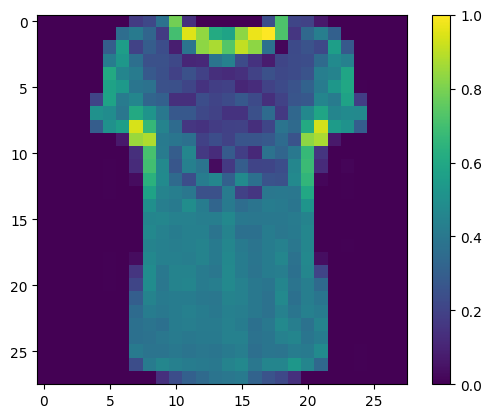

In [ ]:
import matplotlib.pyplot as plt

plt.figure()
plt.imshow(X_train[1])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28, 28]))
model.add(keras.layers.Dense(300, activation='relu'))
model.add(keras.layers.Dense(100, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

In [ ]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation='relu'),
    keras.layers.Dense(100, activation='relu'),
    keras.layers.Dense(10, activation='softmax'),
])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.layers

In [ ]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='SGD',
              metrics='accuracy')

In [ ]:
history= model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid))

Epoch 1/30
1719/1719 [==============================] - 11s 3ms/step - loss: 0.7201 - accuracy: 0.7627 - val_loss: 0.5117 - val_accuracy: 0.8248
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4871 - accuracy: 0.8297 - val_loss: 0.4837 - val_accuracy: 0.8326
Epoch 3/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.4424 - accuracy: 0.8429 - val_loss: 0.4119 - val_accuracy: 0.8590
Epoch 4/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4159 - accuracy: 0.8527 - val_loss: 0.4058 - val_accuracy: 0.8616
Epoch 5/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3952 - accuracy: 0.8614 - val_loss: 0.3856 - val_accuracy: 0.8656
Epoch 6/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.3787 - accuracy: 0.8663 - val_loss: 0.3850 - val_accuracy: 0.8652
Epoch 7/30
1719/1719 [==============================] - 6s 3ms/step - loss: 0.3637 - accuracy: 0.8713 - val_loss: 0.3646 - val_accuracy

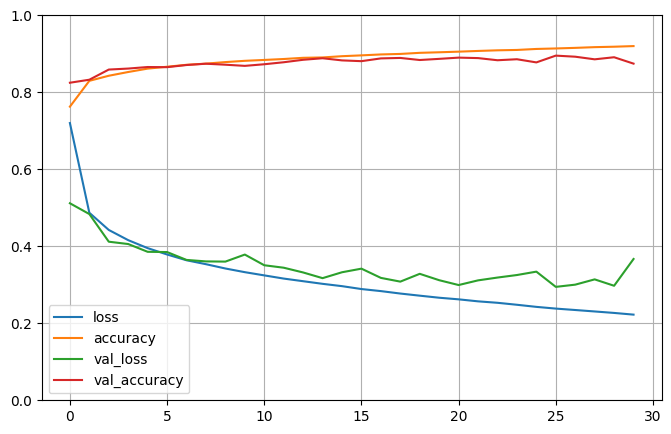

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 104.8252 - accuracy: 0.8012


[104.82521057128906, 0.8011999726295471]

In [ ]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

1/1 [==============================] - 0s 75ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [ ]:
import  numpy as np
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

1/1 [==============================] - 0s 21ms/step


array([9, 2, 1])

In [ ]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [ ]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

In [ ]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

print(X_train.shape)
print(X_train.shape[1:])

(11610, 8)
(8,)


In [ ]:
import tensorflow as tf
from tensorflow import keras

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu",
                       input_shape = X_train.shape[1:]),
    keras.layers.Dense(1)
    ])

In [ ]:
model.compile(loss="mean_squared_error", optimizer="sgd")

In [ ]:
history = model.fit(X_train, y_train, epochs=20,
                    validation_data=(X_valid, y_valid))

Epoch 1/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3199 - val_loss: 0.3227
Epoch 2/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3194 - val_loss: 0.3220
Epoch 3/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3208 - val_loss: 0.3201
Epoch 4/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3184 - val_loss: 0.3208
Epoch 5/20
363/363 [==============================] - 2s 4ms/step - loss: 0.3181 - val_loss: 0.3188
Epoch 6/20
363/363 [==============================] - 2s 5ms/step - loss: 0.3181 - val_loss: 0.3193
Epoch 7/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3172 - val_loss: 0.3186
Epoch 8/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3172 - val_loss: 0.3169
Epoch 9/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3166 - val_loss: 0.3196
Epoch 10/20
363/363 [==============================] - 1s 4ms/step - loss: 0.3178 - val_loss: 0.3277

In [ ]:
mse_test = model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 2ms/step - loss: 0.3305


In [ ]:
mse_test

0.33046624064445496

In [ ]:
X_new=X_test[:3]
y_pred = model.predict(X_new)

1/1 [==============================] - 0s 146ms/step


In [ ]:
y_pred

array([[1.4576162],
       [2.9767375],
       [1.4017491]], dtype=float32)

In [ ]:
y_new = y_test[:3]

In [ ]:
y_new

array([1.214, 2.241, 2.125])

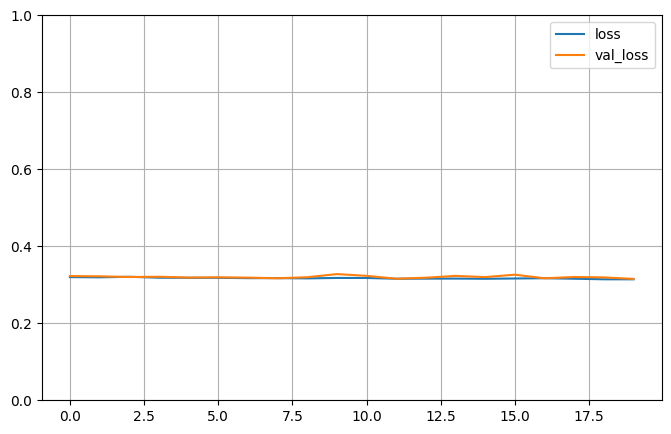

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1) # set the vertical range to [0-1]
plt.show()

In [ ]:
print(y_test)

[1.214 2.241 2.125 ... 0.561 1.738 0.691]
